If you want to open this in google colab, use the link below:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/Joelrrdavis/UF_QMB3302/blob/main/code/notebooks/06_statistics.ipynb)


## Descriptive Statistics

### Mean, Median, Mode

**Concepts:**

- **Mean**: The average of a dataset. It's the sum of all values divided by the number of values.
- **Median**: The middle value when the data is ordered. If there's an even number of observations, the median is the average of the two middle numbers.
- **Mode**: The value that appears most frequently in a dataset.


It is not very common to use the below code in a vacuum, usually you would use this as part of a larger program. There are also some shortcuts to this, for example using ```.describe``` in pandas provides a lot of the same information.

**Python Code Example:**


In [2]:
import numpy as np
import statistics as stats

# Example data
data = [12, 15, 12, 18, 22, 27, 30, 18, 22, 18]

# Mean
mean_value = np.mean(data)
print(f"Mean: {mean_value}")

# Median
median_value = np.median(data)
print(f"Median: {median_value}")

# Mode
mode_value = stats.mode(data)
print(f"Mode: {mode_value}")


Mean: 19.4
Median: 18.0
Mode: 18


Explanation:

* ```numpy.mean()``` calculates the mean.
* ```numpy.median()``` function provides the median.
* ```statistics.mode()``` function gives the mode. If there are multiple modes, the first one is returned.

### Range, Variance, and Standard Deviation
Measuring Spread or Dispersion:

* **Range**: This is difference between the largest and smallest values in the dataset. It provides a simple measure of how spread out the data is.
* **Variance**: The average of the squared differences from the mean. It shows how much the data varies.
* **Standard Deviation**: The square root of the variance, it measures the average amount of variation or spread in the dataset. This is a hard number to interpret without understanding more about variation, which is not covered in detail here. 

In [4]:
# Range
range_value = np.ptp(data)
print(f"Range: {range_value}")

# Variance
variance_value = np.var(data)
print(f"Variance: {variance_value}")

# Standard Deviation
std_dev_value = np.std(data)
print(f"Standard Deviation: {std_dev_value}")


Range: 18
Variance: 31.839999999999993
Standard Deviation: 5.642694391866353


Explanation:

* ```numpy.ptp()``` calculates the range as the difference between the maximum and minimum values.
* ```numpy.var()``` computes the variance of the dataset.
* ```numpy.std()``` calculates the standard deviation, which is the square root of the variance.

### Percentiles and Quartiles

Understanding Data Distribution:

* Percentiles: The value below which a certain percentage of the observations in a given sample fall. For example, the 25th percentile is the value below which 25% of the data can be found.
* Quartiles: Special percentiles that divide the data into four equal parts. The first quartile (Q1) is the 25th percentile, the second quartile (Q2) is the median or 50th percentile, and the third quartile (Q3) is the 75th percentile.

In [3]:
# Percentiles (e.g., 25th, 50th, and 75th percentiles)
percentile_25 = np.percentile(data, 25)
percentile_50 = np.percentile(data, 50)  # This is also the median
percentile_75 = np.percentile(data, 75)

print(f"25th Percentile (Q1): {percentile_25}")
print(f"50th Percentile (Median/Q2): {percentile_50}")
print(f"75th Percentile (Q3): {percentile_75}")


25th Percentile (Q1): 15.75
50th Percentile (Median/Q2): 18.0
75th Percentile (Q3): 22.0


Explanation:

* ```numpy.percentile()``` used to calculate the specific percentiles of a dataset. Note that function is handed things, the data and the percentile to calculate. 
* The 25th percentile (Q1), 50th percentile (median/Q2), and 75th percentile (Q3) are calculated to show how the data is distributed.

## Probability Distributions

### Normal Distribution

Properties and Significance:

* Normal Distribution: Also known as the Gaussian distribution, is a continuous probability distribution that is symmetric, or at least roughly so,  around the mean. Most of the data points are close to the mean, with fewer points appearing as you move further away. Look at the graph the code generates below, notice how the points create the famous bell curve shape?  
* Key Properties: Mean = Median = Mode, symmetric bell curve, defined by its mean and standard deviation. Of course this is not always exactly the case, but the closer these are too each other the more symmetric the distribution will be. 
* Use Cases: The normal distribution is widely used in statistics for hypothesis testing and regression analysis because many real-world phenomena follow a normal distribution.

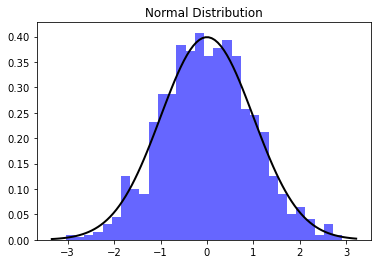

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data that follows a normal distribution
mean = 0
std_dev = 1
data = np.random.normal(mean, std_dev, 1000)

# Plot the distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

# Plot the normal probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution")
plt.show()


Explanation:

* ```np.random.normal()``` generates 1000 data points that follow a normal distribution with mean 0 and standard deviation 1.
* The histogram visualizes the distribution of the data. Note the curve/bell curve
* The ```scipy.stats.norm.pdf()``` function is used to plot the probability density function (PDF) of the normal distribution over the same range.

### Binomial Distribution

Discrete Probability, Success/Failure Scenarios:

* Binomial Distribution: models the number of successes in a fixed number of trials, where each trial is independent and has two possible outcomes (success/failure).
* Key Properties: Defined by the number of trials 𝑛 and the probability of success 𝑝. The outcomes are discrete, unlike the continuous normal distribution.
* Use Cases: Used when there are a fixed number of repeated trials (e.g., flipping a coin, success/failure experiments).

That can be a lot to take in. The  binomial distribution describes the probability of obtaining a fixed number of "successes" in a fixed number of independent trials, where each trial results in either a success or a failure. Each trial is assumed to have the same probability of success, denoted by 𝑝, and the probability of failure is 1−𝑝. 

Example:

Let's suppose we flip a fair coin 10 times. Each time we flip the coin, the probability of getting heads on the coin (we can call that "success") if 50%. We would represent that with $p$ = 0.5. Each flip, or tiral, is independent of the last. It doesn't matter if the last flip was heads or tails, when we flip it again the probability for each flip holds. If we want to know the probability of receiving a certain result, say 6 heads in 10 flips, we can use the binomila formula:

$n$=10 (number of trials) 

$k$=6 (number of successes) 

$p$=0.5

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

Where the binomial coefficient is:

$$
\binom{n}{k} = \frac{n!}{k!(n - k)!}
$$

So in our example:
$$
P(X = 6) = \binom{10}{6} (0.5)^6 (0.5)^4 = \frac{10!}{6!(10-6)!} (0.5)^{10} = 0.205
$$


Here is an example on how to execute this in Python:

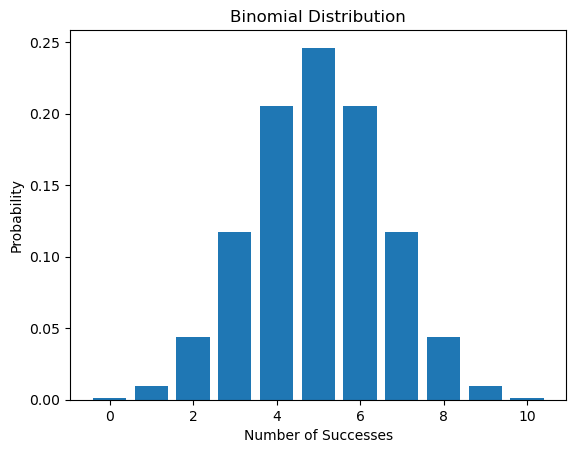

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt

# Enter some parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Binomial distribution: probability of 0 to n successes
x = np.arange(0, n+1)
binomial_pmf = binom.pmf(x, n, p)

# Plot the distribution
plt.bar(x, binomial_pmf)
plt.title("Binomial Distribution")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()


Explanation:

* ```scipy.stats.binom.pmf()``` computes the probability mass function (PMF) for the binomial distribution, which gives the probability of getting a specific number of successes in 𝑛 trials.
* The bar plot visualizes the binomial distribution, where the x-axis represents the number of successes and the y-axis represents the corresponding probability. Going back to our coin fliping example you can see that is just higher than .20.

## Inferential Statistics

### T-tests (One-sample, Two-sample, Paired)

Hypothesis Testing for Comparing Means:

* T-tests: These tests are used to determine if there is a significant difference between the means of two groups or between a sample mean and a known population mean.
* One-sample t-test: Compares the mean of a single group against a known mean.
* Two-sample t-test: Compares the means of two independent groups.
* Paired t-test: Compares the means of the same group at two different times or under two different conditions.


In [8]:
from scipy import stats
import numpy as np

# Example data: sample data
data = [20, 23, 22, 30, 25, 18, 21, 19, 24]

# Population mean to compare against
population_mean = 20

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(data, population_mean)
print(f"One-sample T-test: t-statistic = {t_stat}, p-value = {p_value}")


One-sample T-test: t-statistic = 2.012513156483931, p-value = 0.07896996182720607


Explanation:

* t-statistic: The t-statistic is a measure of how far the sample mean is from the population mean in terms of standard error units. A higher absolute value of the t-statistic indicates a greater difference between the sample and population means.
* p-value: The p-value tells us whether the observed difference is statistically significant. Typically, a p-value less than 0.05 indicates that the sample mean is significantly different from the population mean (with a 5% chance of being wrong if we reject the null hypothesis).

Interpretation:

* If the p-value is small (e.g., < 0.05), we reject the null hypothesis. This means there is evidence that the sample mean is significantly different from the population mean.
* If the p-value is large (e.g., > 0.05), we fail to reject the null hypothesis. This means there isn’t enough evidence to suggest a significant difference between the sample and population means.

In [9]:
# Two-sample data
group1 = [20, 23, 22, 30, 25]
group2 = [18, 19, 24, 22, 20]

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"Two-sample T-test: t-statistic = {t_stat}, p-value = {p_value}")


Two-sample T-test: t-statistic = 1.6873916677505807, p-value = 0.13000864123151049


Expalanation:

This is interpreted in the same way we interpret the one-sample test

* t-statistic: This measures how different the two group means are, relative to the variability within the groups.
* p-value: This indicates whether the difference between the means of the two groups is statistically significant.

Interpretation:

* If the p-value is small (e.g., < 0.05), we reject the null hypothesis, which means there is evidence that the two group means are significantly different.
* If the p-value is large (e.g., > 0.05), we fail to reject the null hypothesis, which suggests there isn’t enough evidence to say the two group means are different.

In [17]:
# Paired data
before = [20, 23, 22, 30, 25]
after = [18, 19, 24, 22, 20]

# Paired t-test
t_stat, p_value = stats.ttest_rel(before, after)
print(f"Paired T-test: t-statistic = {t_stat}, p-value = {p_value}")


Paired T-test: t-statistic = 2.0465595024580763, p-value = 0.11011973663603833


Expalanation:

* t-statistic: This tells you how different the two paired sets of values are (e.g., before and after treatment) compared to the variation within each pair.
* p-value: Indicates whether the difference between the paired values is statistically significant.

Interpretation:

* If the p-value is small (e.g., < 0.05), we reject the null hypothesis. This means there is evidence that the mean difference between the paired values (e.g., before and after) is significantly different from zero.
* If the p-value is large (e.g., > 0.05), we fail to reject the null hypothesis, meaning there is not enough evidence to suggest a significant change between the paired groups.


#### Key Summary for all T-tests:
* Null Hypothesis: Assumes there is no difference (for one-sample, the sample mean equals the population mean; for two-sample, the two group means are equal; for paired, there is no difference between the paired measurements).

Interpretation of p-value:
* p < 0.05: Reject the null hypothesis (there is a statistically significant difference).
* p ≥ 0.05: Fail to reject the null hypothesis (there is no statistically significant difference).

Note: Not covered here is a two proportion z-test.  You would choose a two propotion z-test when you're primary interest is in comparing proportions between groups, and use a t-test when comparing means. The key difference in the two tests is in the population standard deviation. A z-test assumes the population standard deviation is **known**, while a t-test is used when the population standard deviation is unknown or when sample sizes are small. So for example if you have FULL data and are not sampling, you can *know* the population standard deviation and would use a two proportion z-test. 


### Chi-squared Tests

Hypothesis Testing for Categorical Data:

* Chi-squared Test: A statistical test used to determine whether there is a significant association between two categorical variables.
* Chi-squared test of independence: Determines if two categorical variables are independent of each other.
* Goodness of fit: Tests whether observed frequencies match expected frequencies

In [11]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table: rows and columns represent different categories
data = np.array([[50, 30], [20, 40]])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi-squared test: chi2 = {chi2}, p-value = {p}, degrees of freedom = {dof}")


Chi-squared test: chi2 = 10.529166666666667, p-value = 0.0011750518530845063, degrees of freedom = 1


Explanation:

* Chi-squared Test: Checks if there is an association between two categorical variables by comparing observed frequencies to expected frequencies.
* The ```scipy.stats.chi2_contingency()``` function is used to compute the test statistics, p-value, and expected frequencies.

## Correlation and Regression

### Correlation (Pearson, Spearman)

Relationship Between Variables:

* Pearson Correlation: Measures the linear relationship between two continuous variables. It ranges from -1 to 1, where:
    * +1 indicates a perfect positive linear relationship.
    * -1 indicates a perfect negative linear relationship.
    * 0 means no linear relationship.

* Spearman Correlation: A non-parametric measure that assesses how well the relationship between two variables can be described using a monotonic function. It’s often used when data is not normally distributed or the relationship is non-linear.


In [12]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Example data
x = [10, 12, 23, 23, 16, 23, 21, 12, 24, 23]
y = [5, 6, 10, 9, 6, 12, 10, 6, 11, 8]

# Pearson correlation
pearson_corr, _ = pearsonr(x, y)
print(f"Pearson Correlation: {pearson_corr}")

# Spearman correlation
spearman_corr, _ = spearmanr(x, y)
print(f"Spearman Correlation: {spearman_corr}")


Pearson Correlation: 0.8846524666755026
Spearman Correlation: 0.8504737507115376


Explanation:

* The ```pearsonr()``` function calculates the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between two variables.
* The ```spearmanr()``` function calculates the Spearman rank-order correlation, which assesses the strength and direction of a monotonic relationship between two variables.

### Simple Linear Regression

**Linear Regression:** A method to model the relationship between a dependent variable (y) and one or more independent variables (x). In simple linear regression, there’s one independent variable, and the goal is to fit a line that best represents the relationship.

Equation: 
$$
y = \beta_0 + \beta_1x + \epsilon
$$

Where:

* 𝑦 is the dependent variable (the outcome we are trying to predict),
* 𝑥 is the independent variable (the predictor),
* 𝛽0  is the intercept (the value of y when 𝑥=0),
* 𝛽1  is the slope (how much 𝑦 changes for a unit increase in 𝑥),
* 𝜖 is the error term (the difference between the predicted and actual values).

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
x = np.array([10, 12, 23, 23, 16, 23, 21, 12, 24, 23]).reshape(-1, 1)
y = np.array([5, 6, 10, 9, 6, 12, 10, 6, 11, 8])

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Predict values
predicted_y = model.predict(x)
print(f"Predicted values: {predicted_y}")


Intercept: 1.0296322741877928
Slope: 0.3887897179578721
Predicted values: [ 4.91752945  5.69510889  9.97179579  9.97179579  7.25026776  9.97179579
  9.19421635  5.69510889 10.36058551  9.97179579]


#### Output of the Linear Regression

##### Intercept:
The intercept is calculated as:

In [14]:
intercept = model.intercept_
print(f"Intercept: {intercept}")


Intercept: 1.0296322741877928


The intercept (𝛽0) tells us the value of 𝑦 when 𝑥 = 0. In our case, the intercept represents the baseline value of the dependent variable when the independent variable is zero.

For example, if the intercept is 3.5, it means that when 𝑥=0, we expect 
𝑦 to be 3.5.

##### Slope

In [15]:
slope = model.coef_[0]
print(f"Slope: {slope}")


Slope: 0.3887897179578721


The slope (𝛽1) tells us how much 𝑦 increases or decreases with a one-unit increase in 𝑥.

A positive slope means 𝑦 increases as 𝑥 increases, while a negative slope means 𝑦 decreases as 𝑥 increases.

For instance, if the slope is 0.5, it means that for every unit increase in 
𝑥, 𝑦 is expected to increase by 0.5.

##### Predicted Values:


In [ ]:
predicted_y = model.predict(x)
print(f"Predicted values: {predicted_y}")


These are the estimated 𝑦 values for the given 𝑥 values based on the fitted regression line. The closer the predicted values are to the actual values of 𝑦, the better the model fits the data.

### Evaluating the Fit
After fitting the model, we can evaluate how well it fits the data by checking:

* Residuals: The differences between the actual values of 𝑦 and the predicted values.
* R-squared: A common measure that shows how well the independent variable explains the variance in the dependent variable (the closer to 1, the better the fit).

## ANOVA (Analysis of Variance)

### One-way ANOVA

Comparing Means Across Multiple Groups:

* ANOVA (Analysis of Variance): A statistical method used to compare the means of three or more groups to determine if at least one group mean is significantly different from the others.
* One-way ANOVA: Tests the effect of a single independent variable (factor) on a dependent variable. It assumes the groups are independent and normally distributed with equal variances.



In [18]:
from scipy import stats

# Example data: scores from three different groups
group1 = [20, 23, 22, 30, 25]
group2 = [18, 19, 24, 22, 20]
group3 = [25, 28, 22, 27, 29]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print(f"One-way ANOVA: F-statistic = {f_statistic}, p-value = {p_value}")


One-way ANOVA: F-statistic = 4.264285714285714, p-value = 0.03989652843752253


**Explanation:**

* F-statistic: Measures the ratio of between-group variability to within-group variability. A larger F-statistic suggests a larger difference between group means.
* p-value: If the p-value is less than 0.05, it indicates that at least one group mean is significantly different from the others.

**Interpretation:**

* If the p-value is small (e.g., < 0.05), you reject the null hypothesis, which means there is evidence that at least one group mean is significantly different from the others.
* If the p-value is large (e.g., > 0.05), you fail to reject the null hypothesis, meaning there isn’t enough evidence to suggest a difference between the group means.

## Non-parametric Tests

#### Mann-Whitney U Test
Non-parametric Alternative to the T-test:

* Mann-Whitney U Test: This test compares the distributions of two independent groups. It’s used when the data doesn't meet the assumptions of normality required by the t-test.


In [19]:
from scipy.stats import mannwhitneyu

# Example data for two independent groups
group1 = [20, 23, 22, 30, 25]
group2 = [18, 19, 24, 22, 20]

# Perform the Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value}")


Mann-Whitney U Test: U-statistic = 5.0, p-value = 0.07061908194440973


**Explanation:**

* U-statistic: The Mann-Whitney U test statistic, which ranks the observations to compare distributions.
* p-value: If the p-value is less than 0.05, you reject the null hypothesis and conclude that the distributions of the two groups are different.

#### Kruskal-Wallis Test

Non-parametric Alternative to ANOVA:

* Kruskal-Wallis Test: This test is used to compare the distributions of three or more independent groups. It’s the non-parametric alternative to the one-way ANOVA and is used when the assumptions of ANOVA are violated.


In [20]:
from scipy.stats import kruskal

# Example data for three independent groups
group1 = [20, 23, 22, 30, 25]
group2 = [18, 19, 24, 22, 20]
group3 = [25, 28, 22, 27, 29]

# Perform the Kruskal-Wallis Test
h_statistic, p_value = kruskal(group1, group2, group3)
print(f"Kruskal-Wallis Test: H-statistic = {h_statistic}, p-value = {p_value}")


Kruskal-Wallis Test: H-statistic = 5.979061371841154, p-value = 0.05031104286457823


Explanation:

* H-statistic: The test statistic for the Kruskal-Wallis test. It assesses whether the group distributions differ significantly.
* p-value: If the p-value is less than 0.05, you reject the null hypothesis and conclude that at least one group’s distribution is significantly different from the others.


## Confidence Intervals

Understanding and Calculating Confidence Intervals:

* Confidence Interval (CI): A range of values that is likely to contain the population parameter (e.g., the mean) with a certain level of confidence (typically 95%). The confidence level indicates how certain we are that the interval contains the true population parameter.
* A 95% confidence interval means that if we were to take 100 different samples and compute the CI for each, we would expect about 95 of those intervals to contain the true population parameter.

Formula for a Confidence Interval:

For a sample mean, the confidence interval can be calculated as:

$$
\text{CI} = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
$$

Where:
* $\bar{x}$ is the sample mean,
* $ z $ is the critical value from the Z-distribution (e.g., 1.96 for a 95% confidence interval),
* 𝑠 is the sample standard deviation,
* 𝑛 is the sample size.

In [ ]:
import numpy as np
from scipy import stats

# Example data
data = [20, 23, 22, 30, 25, 18, 21, 19, 24]

# Calculate the mean and standard error
mean = np.mean(data)
std_err = stats.sem(data)  # Standard error of the mean

# 95% confidence interval
confidence = 0.95
h = std_err * stats.t.ppf((1 + confidence) / 2, len(data) - 1)

lower_bound = mean - h
upper_bound = mean + h

print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


Explanation:

* Standard Error (SE): This is the standard deviation of the sampling distribution of a statistic. It measures the accuracy of the sample mean as an estimate of the population mean.
* The confidence interval is constructed by adding and subtracting the margin of error (calculated as 𝑧⋅𝑆𝐸) from the sample mean.

## P-Values and Significance Testing
(Note there is considerable disagreement on whether or not we should use p-values. I am in the camp that we should not. But I provide them here because many other reasonable people disagree.)


Understanding P-values:

* P-value: The p-value tells you the probability of observing the data (or something more extreme) given that the null hypothesis is true. It helps determine the statistical significance of the result.

* Significance Level: The threshold for deciding whether to reject the null hypothesis, commonly set at 𝛼=0.05. If the p-value is less than 𝛼, the result is considered statistically significant.

* Null Hypothesis (H0): Assumes no effect or no difference.

* Alternative Hypothesis (H1): Assumes some effect or difference.

Interpreting P-values:

* p < 0.05: Reject the null hypothesis. The result is statistically significant.
* p ≥ 0.05: Fail to reject the null hypothesis. The result is not statistically significant.


In [21]:
# Example: Two-sample T-test for independent groups
group1 = [20, 23, 22, 30, 25]
group2 = [18, 19, 24, 22, 20]

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.6873916677505807, P-value: 0.13000864123151049
